In [3]:
import pandas as pd
import os
import zipfile

def carregar_base_dados():
    with zipfile.ZipFile('base_dados.zip', 'r') as zip_ref:
        # Cria um diretório temporário para extrair os arquivos
        temp_dir = 'temp_extracted_data'
        os.makedirs(temp_dir, exist_ok=True)
        zip_ref.extractall(temp_dir)

    csv_file = os.path.join(temp_dir, os.listdir(temp_dir)[0])
    return csv_file

csv_file = carregar_base_dados()
df = pd.read_csv(csv_file)

df.head()

,gênero,idade,peso,altura,meta,restricao,classificação
0,masculino,33,86,1.54,hipertrofia,nenhuma,intensivo
1,feminino,19,78,1.84,hipertrofia,nenhuma,intensivo
2,masculino,32,81,1.93,hipertrofia,nenhuma,intensivo
3,feminino,36,88,1.96,emagrecimento,nenhuma,intensivo
4,masculino,30,86,1.85,hipertrofia,nenhuma,intensivo


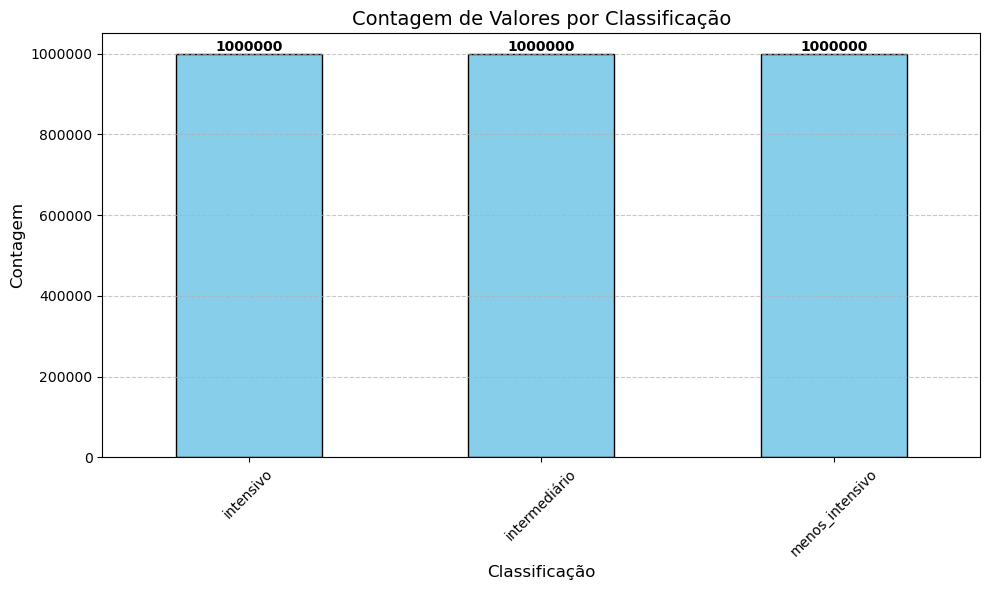

In [53]:
import matplotlib.pyplot as plt

# Contagem de valores por classificação
counts = df['classificação'].value_counts()

plt.figure(figsize=(10, 6))
ax = counts.plot(kind='bar', color='skyblue', edgecolor='black')  

# Adicionando os valores das contagens acima das barras com formatação estilizada
for i, v in enumerate(counts):
    ax.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.title('Contagem de Valores por Classificação', fontsize=14) 
plt.xlabel('Classificação', fontsize=12)  
plt.ylabel('Contagem', fontsize=12)  
plt.xticks(rotation=45) 
plt.yticks(fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()  
plt.show()


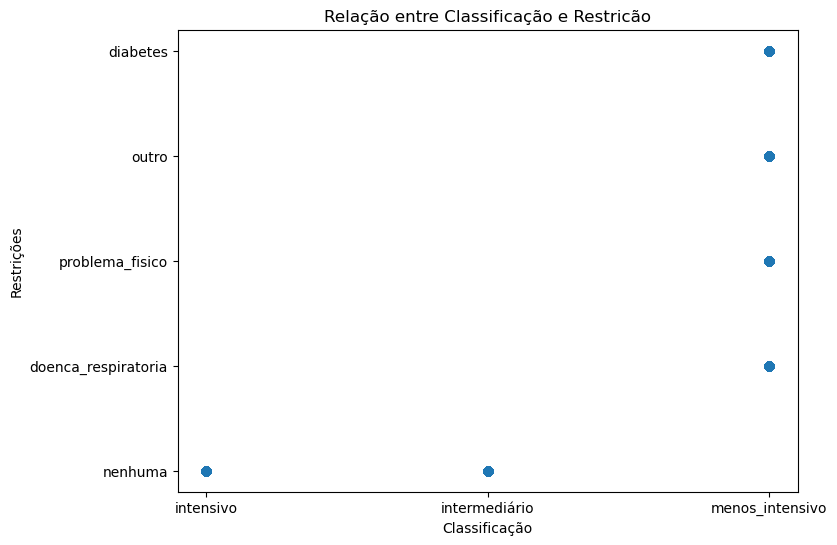

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['classificação'], df['restricao'])
plt.title('Relação entre Classificação e Restricão')
plt.xlabel('Classificação')
plt.ylabel('Restrições')
plt.show()

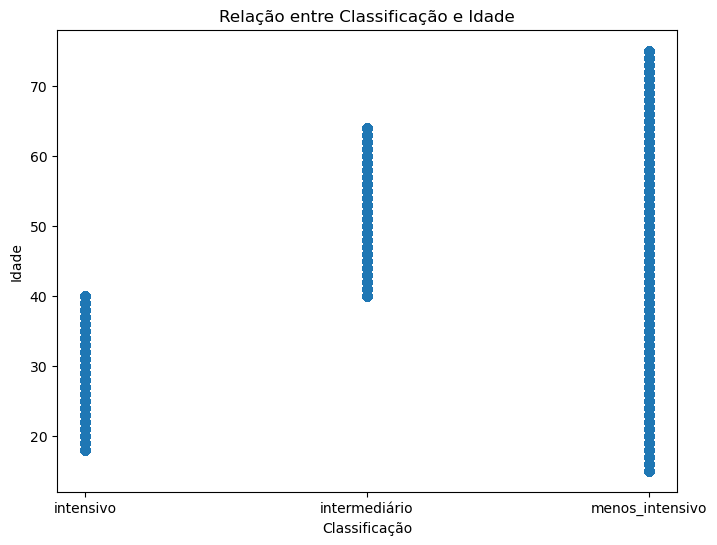

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(df['classificação'], df['idade'])
plt.title('Relação entre Classificação e Idade')
plt.xlabel('Classificação')
plt.ylabel('Idade')
plt.show()

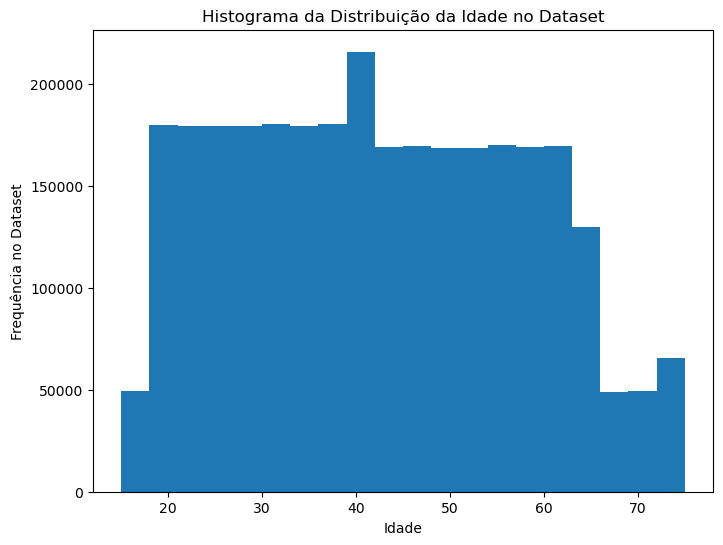

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['idade'], bins=20)
plt.title('Histograma da Distribuição da Idade no Dataset')
plt.xlabel('Idade')
plt.ylabel('Frequência no Dataset')
plt.show()

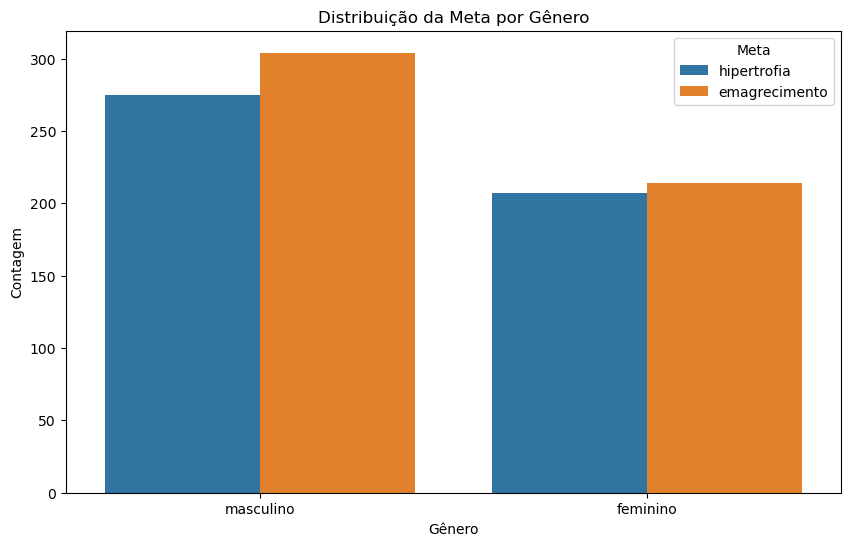

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sample_df = df.sample(n=1000) 

plt.figure(figsize=(10, 6))
sns.countplot(x='gênero', hue='meta', data=sample_df)
plt.title('Distribuição da Meta por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Meta')
plt.show()

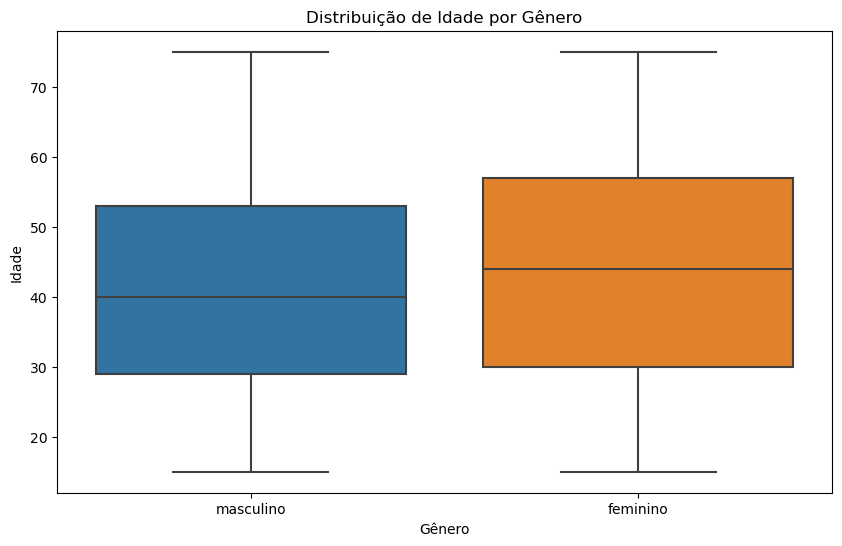

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gênero', y='idade', data=df)
plt.title('Distribuição de Idade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.show()

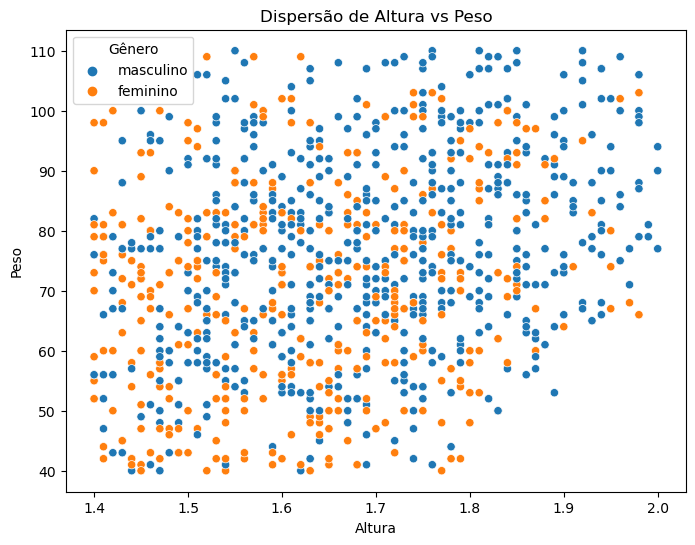

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='altura', y='peso', data=sample_df, hue='gênero')
plt.title('Dispersão de Altura vs Peso')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend(title='Gênero')
plt.show()

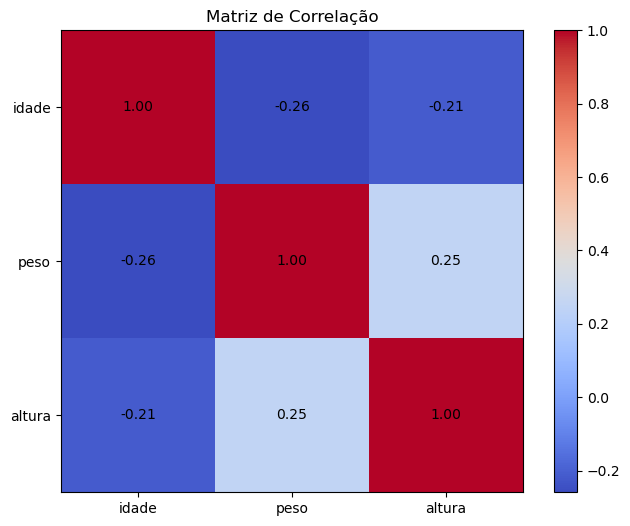

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Matriz de correlação fornecida
data = np.array([
    [1.000000, -0.259316, -0.214693],
    [-0.259316, 1.000000, 0.252183],
    [-0.214693, 0.252183, 1.000000]
])

# Rótulos das variáveis
labels = ['idade', 'peso', 'altura']

# Criando o heatmap da matriz de correlação usando Matplotlib
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(data, cmap='coolwarm', interpolation='nearest')

# Adicionando valores nos blocos do heatmap
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='black')

# Adicionando rótulos aos eixos
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)

# Adicionando a barra de cores
plt.colorbar(heatmap)

plt.title('Matriz de Correlação')
plt.show()


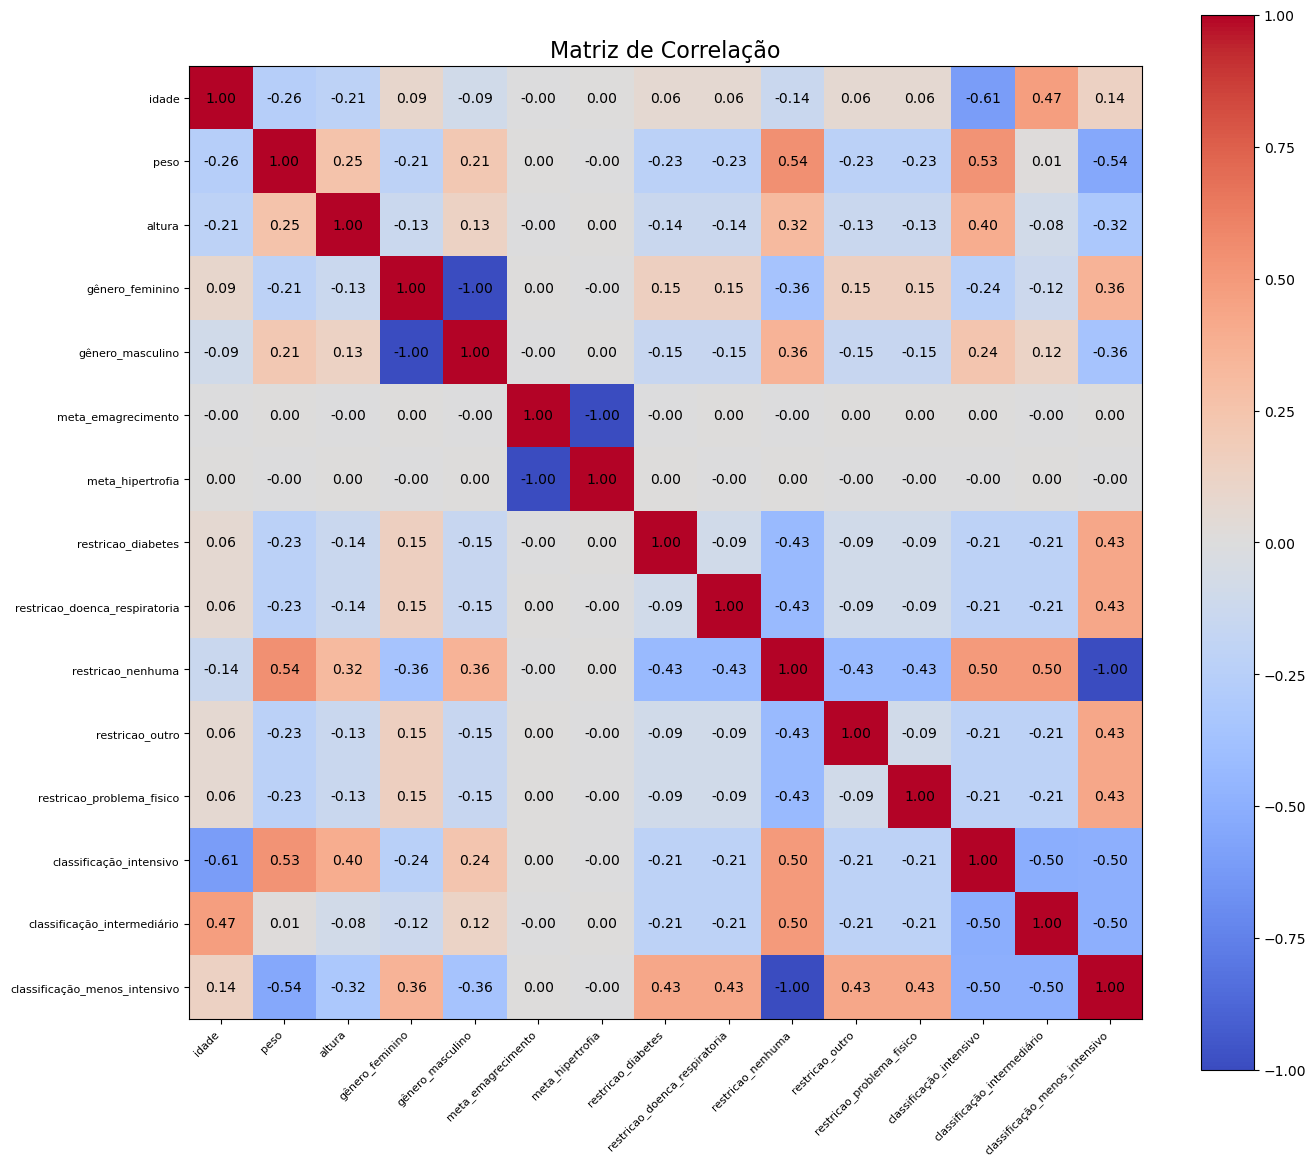

In [47]:
# Aplicando a codificação one-hot para converter variáveis categóricas em variáveis binárias
df_encoded = pd.get_dummies(df)

# Calculando a matriz de correlação entre as variáveis codificadas
corr_matrix = df_encoded.corr()

df_corr = pd.DataFrame(corr_matrix)

corr_matrix_np = df_corr.values  

fig, ax = plt.subplots(figsize=(14, 12)) 
im = ax.imshow(corr_matrix_np, cmap='coolwarm', interpolation='nearest')

# Mostrar valores na matriz
for i in range(len(df_corr.columns)):
    for j in range(len(df_corr.columns)):
        text = ax.text(j, i, f'{corr_matrix_np[i, j]:.2f}', ha='center', va='center', color='black')

# Configurações dos eixos
ax.set_xticks(np.arange(len(df_corr.columns)))
ax.set_yticks(np.arange(len(df_corr.columns)))
ax.set_xticklabels(df_corr.columns, rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(df_corr.columns, fontsize=8)

# Configurações da corbar (barra de cores)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=10)  # Tamanho dos valores na barra de cores

# Título e exibição
plt.title('Matriz de Correlação', fontsize=16)
plt.tight_layout()
plt.savefig('matriz_tcc.png', dpi=300)
plt.show()

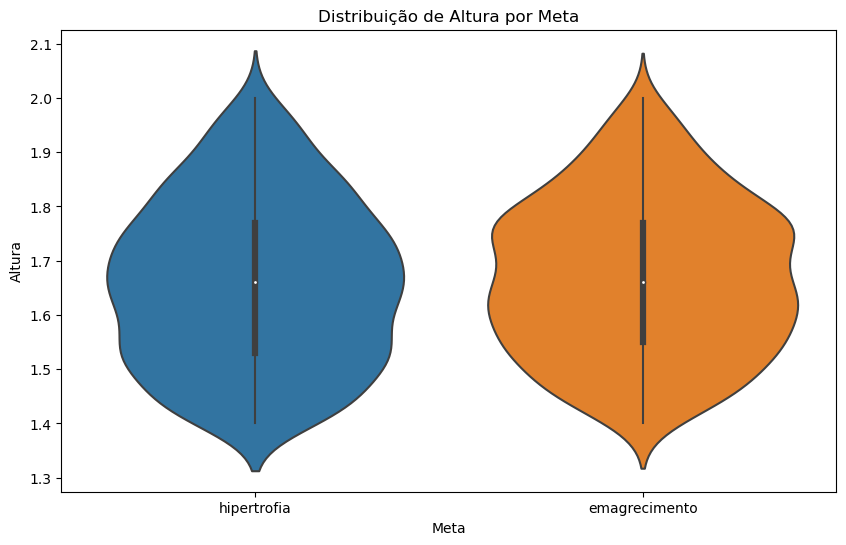

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='meta', y='altura', data=sample_df)
plt.title('Distribuição de Altura por Meta')
plt.xlabel('Meta')
plt.ylabel('Altura')
plt.show()

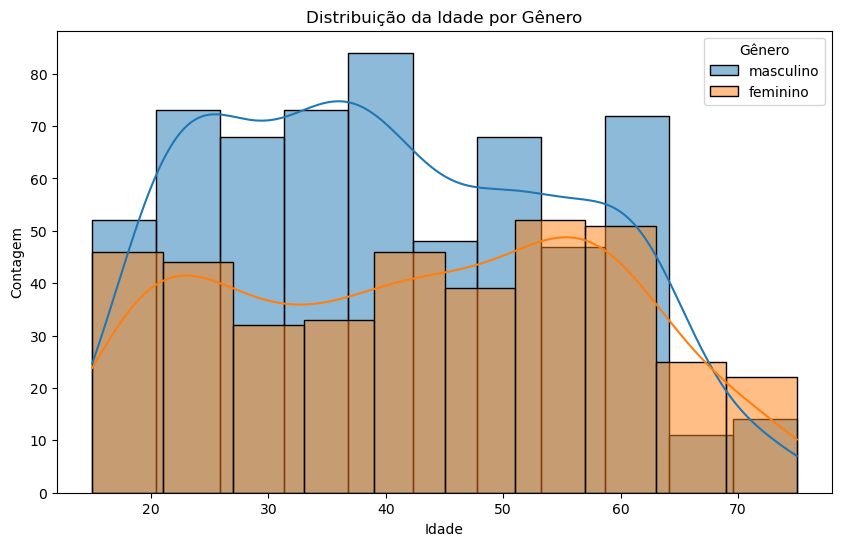

In [ ]:
# Filtrando os dados por gênero para criar a legenda
generos = sample_df['gênero'].unique()

plt.figure(figsize=(10, 6))

# Loop para plotar o histograma para cada gênero
for genero in generos:
    sns.histplot(data=sample_df[sample_df['gênero'] == genero], x='idade', label=genero, kde=True, alpha=0.5)

plt.title('Distribuição da Idade por Gênero')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.legend(title='Gênero')
plt.show()

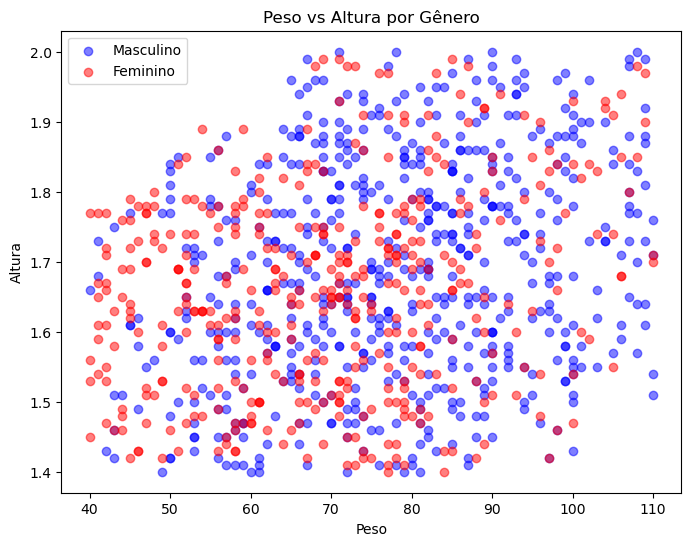

In [23]:
# Definindo cores e legendas para cada categoria (gênero)
colors = {'masculino': 'blue', 'feminino': 'red'}
labels = {'masculino': 'Masculino', 'feminino': 'Feminino'}

# Criando o gráfico de dispersão com diferentes cores e legendas para cada categoria
plt.figure(figsize=(8, 6))
for category, color in colors.items():
    plt.scatter(sample_df[sample_df['gênero'] == category]['peso'], sample_df[sample_df['gênero'] == category]['altura'],
                alpha=0.5, color=color, label=labels[category])

plt.title('Peso vs Altura por Gênero')
plt.xlabel('Peso(Kg)')
plt.ylabel('Altura')
plt.legend()
plt.show()


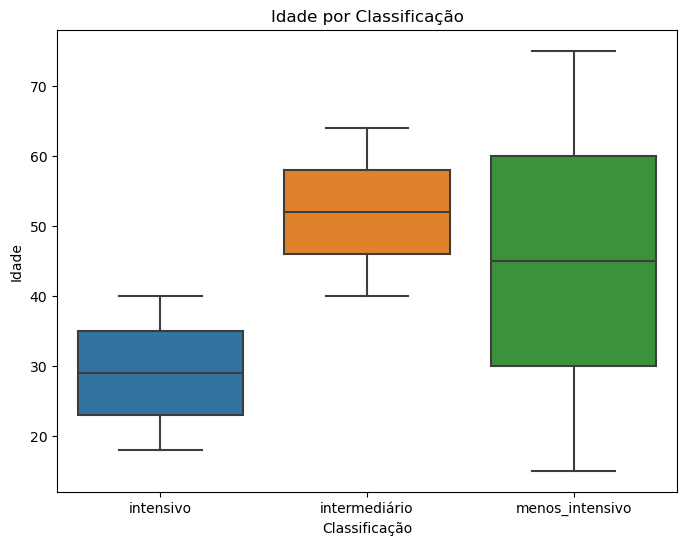

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='classificação', y='idade', data=df, palette='tab10')
plt.title('Idade por Classificação')
plt.xlabel('Classificação')
plt.ylabel('Idade')
plt.show()

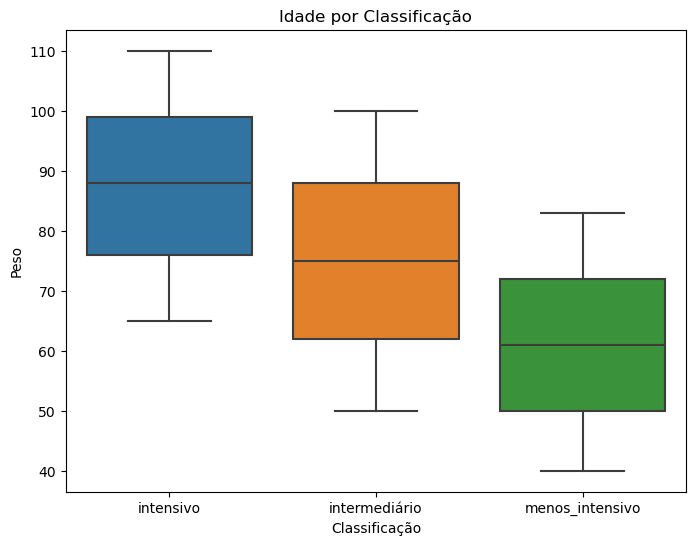

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='classificação', y='peso', data=df, palette='tab10')
plt.title('Idade por Classificação')
plt.xlabel('Classificação')
plt.ylabel('Peso')
plt.show()

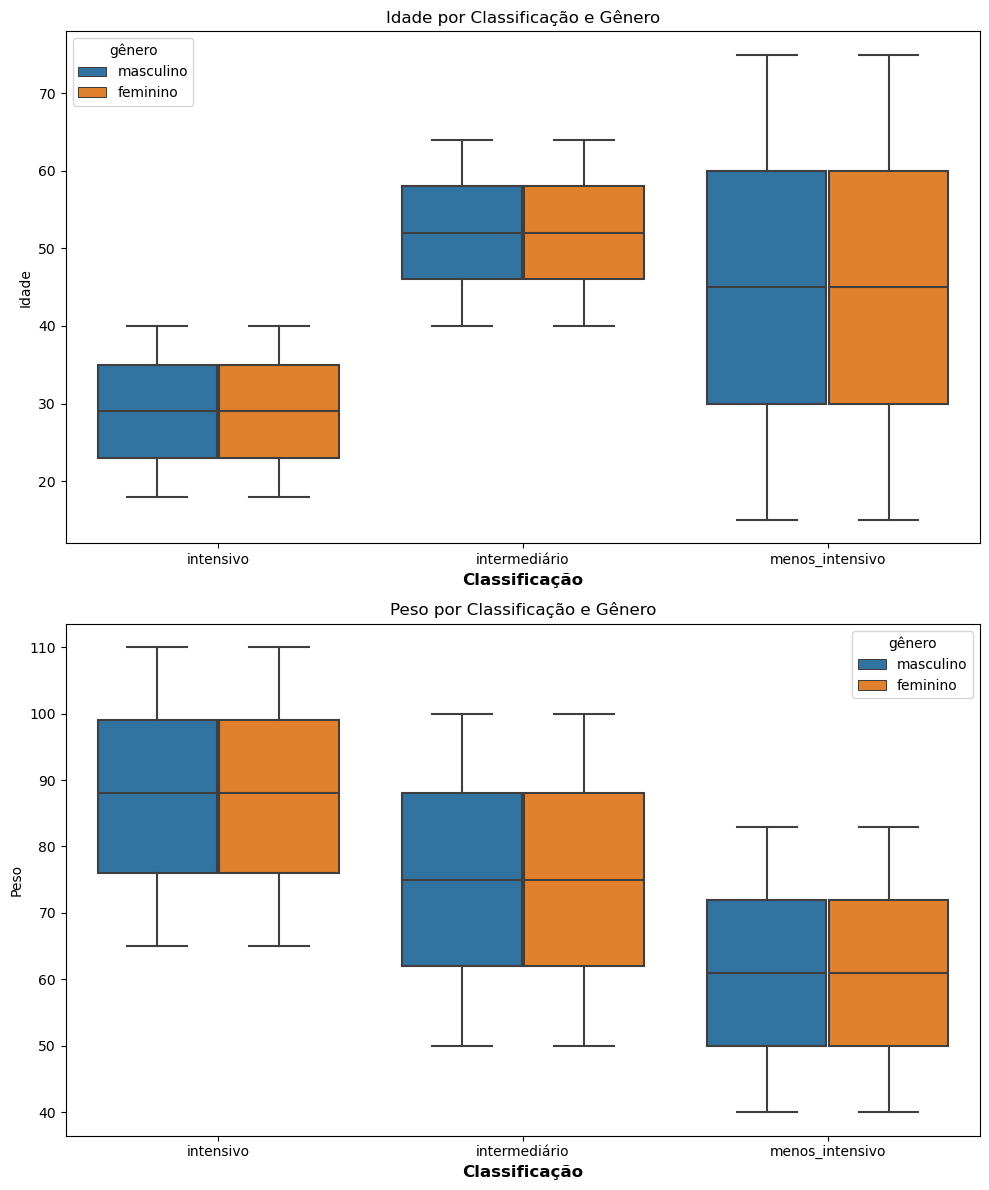

In [45]:
# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Boxplot para idade por classificação separado por gênero
sns.boxplot(x='classificação', y='idade', hue='gênero', data=df, palette='tab10', ax=axes[0])
axes[0].set_title('Idade por Classificação e Gênero')
axes[0].set_xlabel('Classificação', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Idade')

# Boxplot para peso por classificação separado por gênero
sns.boxplot(x='classificação', y='peso', hue='gênero', data=df, palette='tab10', ax=axes[1])
axes[1].set_title('Peso por Classificação e Gênero')
axes[1].set_xlabel('Classificação', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Peso')

# Ajustando layout e exibindo a figura
plt.tight_layout()
plt.show()

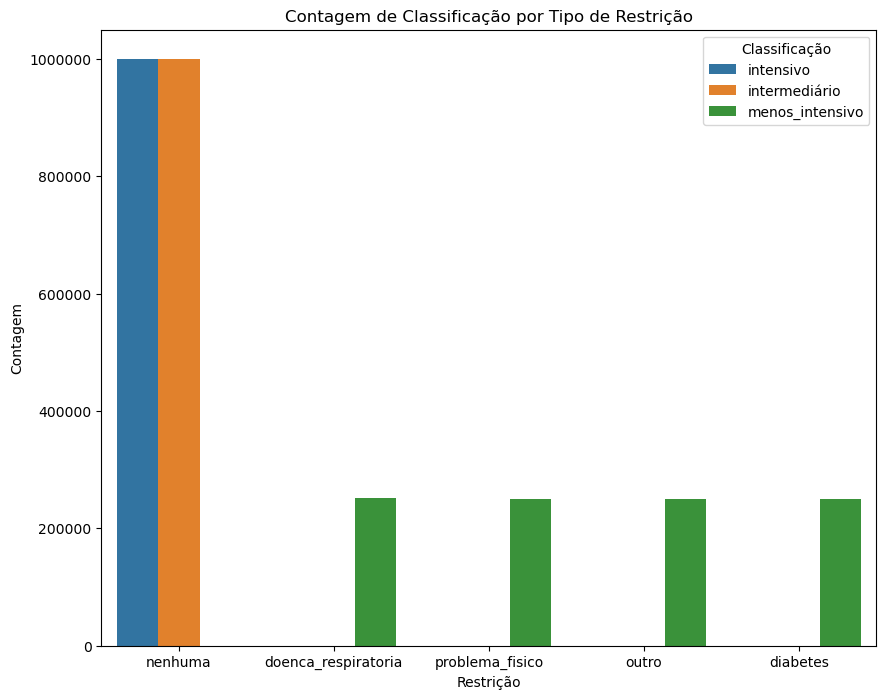

In [55]:
plt.figure(figsize=(10, 8))
sns.countplot(x='restricao', hue='classificação', data=df, palette='tab10')
plt.title('Contagem de Classificação por Tipo de Restrição')
plt.xlabel('Restrição')
plt.ylabel('Contagem')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Classificação')
plt.show()

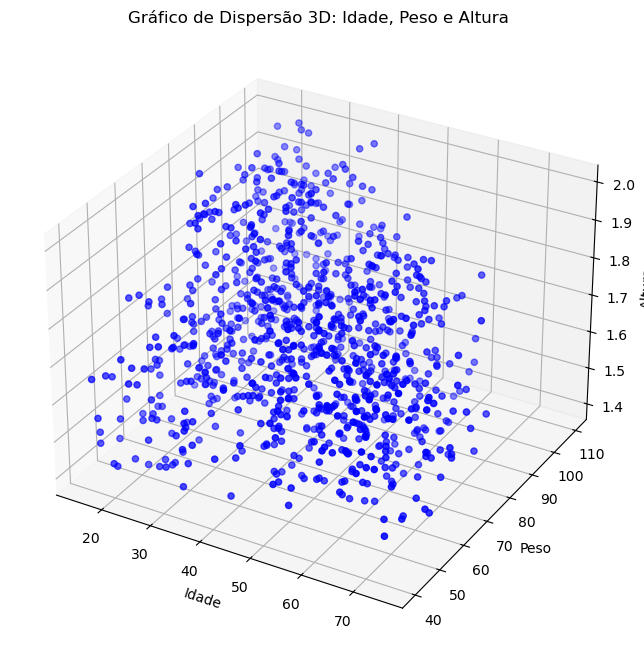

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# Selecionando três variáveis numéricas para o gráfico de dispersão 3D
data_for_plot = sample_df[['idade', 'peso', 'altura']]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando o gráfico de dispersão 3D
ax.scatter(data_for_plot['idade'], data_for_plot['peso'], data_for_plot['altura'], c='blue', marker='o')

ax.set_xlabel('Idade')
ax.set_ylabel('Peso')
ax.set_zlabel('Altura')

plt.title('Gráfico de Dispersão 3D: Idade, Peso e Altura')
plt.show()


<Figure size 1000x800 with 0 Axes>

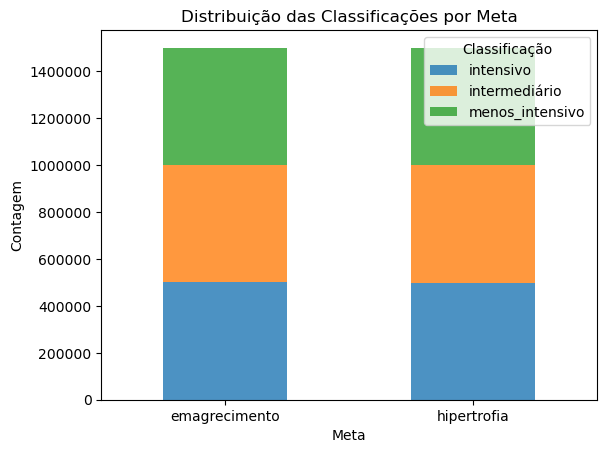

In [54]:
# Criando um DataFrame filtrando apenas as duas metas
df_filtered = df[(df['meta'] == 'hipertrofia') | (df['meta'] == 'emagrecimento')]

# Contagem das classificações para cada meta
data = df_filtered.groupby(['meta', 'classificação']).size().unstack()

# Plotando o gráfico de barras empilhadas
plt.figure(figsize=(10, 8))
data.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.8)
plt.title('Distribuição das Classificações por Meta')
plt.xlabel('Meta')
plt.ylabel('Contagem')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.legend(title='Classificação')
plt.show()

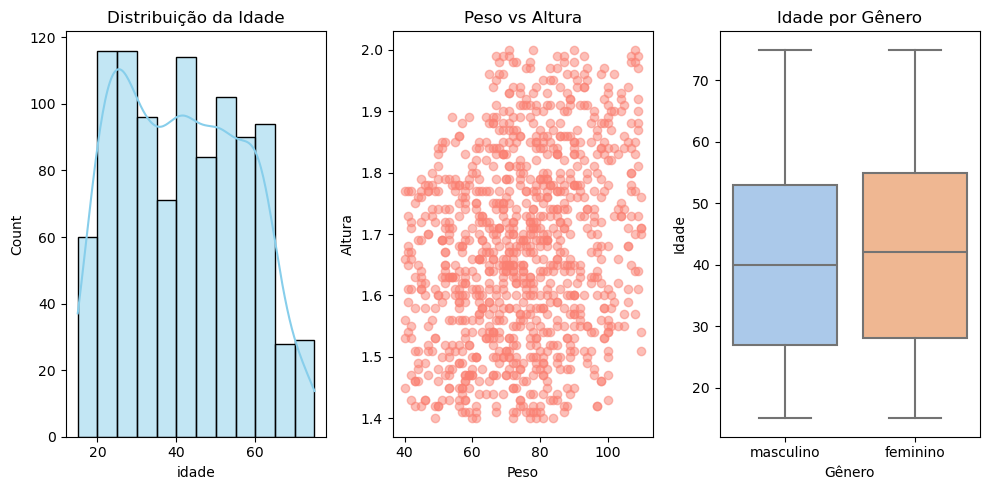

In [41]:
# Histograma de idade
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.histplot(sample_df['idade'], kde=True, color='skyblue')
plt.title('Distribuição da Idade')

# Gráfico de dispersão de peso vs altura
plt.subplot(1, 3, 2)
plt.scatter(sample_df['peso'], sample_df['altura'], alpha=0.5, color='salmon')
plt.title('Peso vs Altura')
plt.xlabel('Peso')
plt.ylabel('Altura')

# Boxplot de idade por gênero
plt.subplot(1, 3, 3)
sns.boxplot(x='gênero', y='idade', data=sample_df, palette='pastel')
plt.title('Idade por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Idade')

plt.tight_layout()
plt.show()